In [1]:
# imports
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# reading in final data csv
finalDataSet = pd.read_csv('../data/finalDataSet2018to2021.csv')
finalDataSet.head()

,song,performer,chart_position,previous_position,peak,weeks_on_chart,hitTF,id,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dance Monkey,Tones And I,11.0,19.0,11.0,8.0,1.0,2XU0oxnq2qxCpomAAuJY8K,0.824,0.588,...,-6.400,0.0,0.0924,0.6920,0.000104,0.149,0.513,98.027,209438.0,4.0
1,Mine,Bazzi,56.0,0.0,56.0,1.0,1.0,7uzmGiiJyRfuViKKK3lVmR,0.710,0.789,...,-3.874,1.0,0.0722,0.0161,0.000003,0.451,0.717,142.929,131064.0,4.0
2,Final Fantasy,Drake,56.0,0.0,56.0,1.0,1.0,44Du2IM1bGY7dicmLfXbUs,0.500,0.449,...,-10.977,1.0,0.4420,0.4220,0.000008,0.115,0.104,144.206,219960.0,1.0
3,Hear Me Calling,Juice WRLD,56.0,0.0,56.0,1.0,1.0,13ZyrkCDmRz5xY3seuAWYk,0.699,0.687,...,-3.997,0.0,0.1060,0.3080,0.000036,0.121,0.499,88.932,189977.0,4.0
4,Liar,Camila Cabello,56.0,0.0,56.0,1.0,1.0,7LzouaWGFCy4tkXDOOnEyM,0.740,0.498,...,-6.684,0.0,0.0456,0.0169,0.002820,0.319,0.652,98.016,207039.0,4.0


In [3]:
# checking dtypes to make sure all numbers are numeric types
finalDataSet.dtypes

song                  object
performer             object
chart_position       float64
previous_position    float64
peak                 float64
weeks_on_chart       float64
hitTF                float64
id                    object
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

In [4]:
# getting the cols that will be features in the models
bb_feature_num = finalDataSet.select_dtypes(['int', 'float'])

In [5]:
# Logistic Regression model function
def LogRegModel(X, y, size=None):
#     splitting test and training datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=size + 0.05)
#     fitting the scaler to the x_train dataset
    X_scaler = MinMaxScaler().fit(X_train)
# scaling the x train, test and values datasets
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    X_val_scaled = X_scaler.transform(X_val)
    
    LogReg = LogisticRegression()
    
    t = time.time()
    LogReg.fit(X_train_scaled, y_train)
    elapsed_time = time.time() - t
#     print results of training and testing 
    print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
    print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}", '\n')
#     creating predictions
    predictions = LogReg.predict(X_val_scaled)
#     scoring predictions
    print(classification_report(y_val, predictions, target_names=['not hit','hit']), '\n')
# saving model    
    pickle.dump(LogReg, open('../models/LogRegW2021.sav', 'wb'))
    return LogReg.score(X_train_scaled, y_train), LogReg.score(X_test_scaled, y_test)

In [6]:
# setting the X and y values for input into the LogReg model
# song numeric fields are x values
X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF'].values
# whether it is a hit is the y value
y = bb_feature_num['hitTF'].values

In [7]:
# calling the LogRegModel funct on data w/ test size 20%
LogRegModel(X, y, size=0.2);

Training Data Score: 0.9850948509485095
Testing Data Score: 0.9796954314720813 

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99       840
         hit       1.00      0.87      0.93       145

    accuracy                           0.98       985
   macro avg       0.99      0.93      0.96       985
weighted avg       0.98      0.98      0.98       985
 



In [8]:
# creating variety of test sizes for the function
test_size = [x / 10 for x in range(1,10)]

In [9]:
# calling LogRegModel on data for different %ages of testing sizes
scores = {
    'test_size': [],
    'train_score': [],
    'test_score': []
}

for size in test_size:
    print(f'{size * 100}% of data is test --> {(1 - size) * 100}% is training')
    train_score, test_score = LogRegModel(X, y, size)
    scores['test_size'].append(size)
    scores['train_score'].append(train_score)
    scores['test_score'].append(test_score)

10.0% of data is test --> 90.0% is training
Training Data Score: 0.9853878852284803
Testing Data Score: 0.9817444219066938 

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99       578
         hit       1.00      0.90      0.95        87

    accuracy                           0.99       665
   macro avg       0.99      0.95      0.97       665
weighted avg       0.99      0.99      0.99       665
 

20.0% of data is test --> 80.0% is training
Training Data Score: 0.9840785907859079
Testing Data Score: 0.983756345177665 

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99       858
         hit       1.00      0.87      0.93       127

    accuracy                           0.98       985
   macro avg       0.99      0.93      0.96       985
weighted avg       0.98      0.98      0.98       985
 

30.0% of data is test --> 70.0% is training
Training Data Score: 0.9852612773559625
Testing D

In [10]:
score_df = pd.DataFrame(scores)

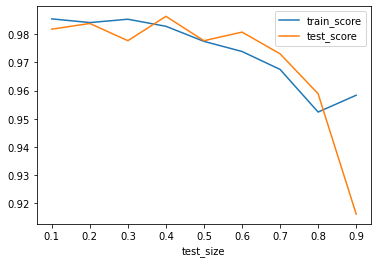

In [11]:
# plotting the size of testing data set against how well the model performed on test and train sets
score_df.plot.line(x='test_size');

In [12]:
# prep for SVM
X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF'].values
y = bb_feature_num['hitTF'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# scaling data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

In [13]:
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.45112627, 0.06219815,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.58805412, 0.0385223 ,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.48970344, 0.04181723,
        0.8       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.62110906, 0.06105997,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.54078655, 0.05816704,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.55382706, 0.05271203,
        0.8       ]])

In [14]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train);

In [15]:
svm_predictions = SVM.predict(X_test_scaled)

In [16]:
print(classification_report(y_test, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00      3429
         hit       1.00      0.96      0.98       509

    accuracy                           0.99      3938
   macro avg       1.00      0.98      0.99      3938
weighted avg       0.99      0.99      0.99      3938



In [17]:
confusion_matrix(y_test, svm_predictions)

array([[3429,    0],
       [  22,  487]])

In [18]:
svm_predictions = SVM.predict(X_val_scaled)
print(classification_report(y_val, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       1.00      1.00      1.00       211
         hit       1.00      1.00      1.00        35

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



In [19]:
confusion_matrix(y_val, svm_predictions)

array([[211,   0],
       [  0,  35]])

In [20]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# pca.fit(X)

# reduced_X = pca.transform(X)

In [32]:
y = bb_feature_num['hitTF'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Scale data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train)

svm_predictions = SVM.predict(X_test_scaled)
print(classification_report(y_test, svm_predictions, target_names=['not hit','hit']))

confusion_matrix(y_test, svm_predictions)

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00      3420
         hit       1.00      0.94      0.97       518

    accuracy                           0.99      3938
   macro avg       1.00      0.97      0.98      3938
weighted avg       0.99      0.99      0.99      3938



array([[3420,    0],
       [  33,  485]])

Number of support vectors: 75


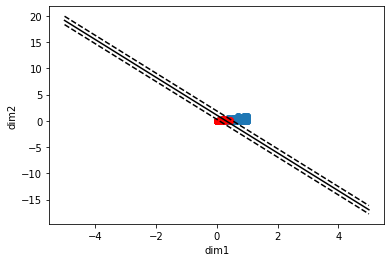

In [33]:
import numpy as np
# get the separating hyperplane
w = SVM.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (SVM.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(SVM.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

support_vectors = SVM.support_vectors_
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
# plt.title('Linearly separable data with support vectors')
plt.xlabel('dim1')
plt.ylabel('dim2')

plt.axis('tight')

print(f'Number of support vectors: {len(support_vectors)}')

In [34]:
pickle.dump(SVM, open('../models/SVMw2021.sav', 'wb'))

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=200)

In [37]:
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.999746063991874

In [39]:
importances = rf.feature_importances_
importances

array([4.11686397e-01, 3.56336105e-02, 2.25366224e-01, 2.81160045e-01,
       5.52584652e-03, 5.81944144e-03, 8.83835534e-04, 3.55725310e-03,
       4.88585638e-04, 6.67124589e-03, 2.20118047e-03, 2.31384031e-03,
       4.22776183e-03, 2.99617457e-03, 3.78946844e-03, 7.29659410e-03,
       3.82495108e-04])

In [40]:
feature_cols = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF'].columns

In [41]:
feature_impt = {
    'feats':feature_cols,
    'importance': importances
}

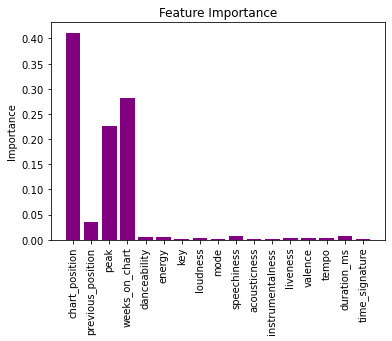

In [42]:
plt.bar(x=feature_impt['feats'], height=feature_impt['importance'], color='purple')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.ylabel('Importance');
plt.savefig('../data/feature_importanceW2021.png', dpi=400, bbox_inches='tight');

In [43]:
pickle.dump(rf, open('../../models/rfW2021.sav', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: '../../models/rfW2021.sav'